In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.describe()


,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Dropping irrelevant features not being used to build the model


In [5]:
df = df.drop(["area_type", "society", "balcony", "availability"], axis="columns")
df.shape

(13320, 5)

Checking for null values


In [6]:
df.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Since we have sufficient data we can drop null values


In [7]:
df = df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df["size"].value_counts()
# this feature needs to be changed for any work to be done on it

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [9]:
df["bath"].value_counts()

2.0     6908
3.0     3285
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [10]:
df["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [11]:
df["location"].value_counts()

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

<h3>Feature engineering</h3>
Replacing size feature by bhk


In [12]:
df["bhk"] = df["size"].apply(lambda x: int(x.split(" ")[0]))
df["bhk"].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bhk, dtype: int64

In [13]:
df.drop("size", axis=1)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


<h3>Plotting graphs</h3>


Text(0, 0.5, 'price')

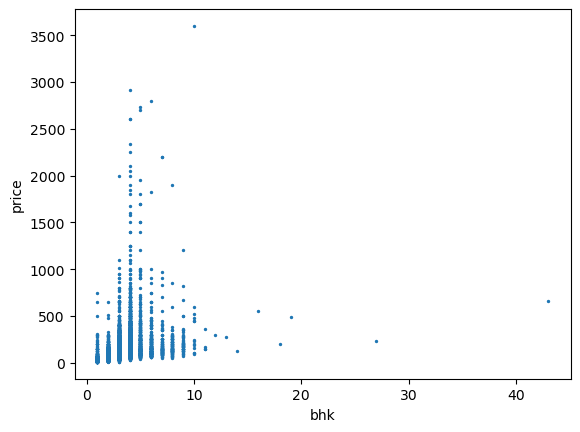

In [14]:
plt.scatter(df.bhk, df.price, s=2)
plt.xlabel("bhk")
plt.ylabel("price")
# data with outliers can be seen
# no clear patterns are visible, so further processing of data has to be done

In [15]:
df["total_sqft"].dtype
# string data with some ranges, need to convert into a float value

dtype('O')

In [16]:
def is_float(x):
    """
    function to check for float values
    """
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df[~df["total_sqft"].apply(is_float)].shape
# 190 rows of data having ranges instead of a single float value

(190, 6)

In [18]:
# as an example of the above assumption
df[~df["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [19]:
def convert_range_to_float(x):
    """
    function to convert range of total_sqft to a single float value,
    assuming the size to be average of the upper and lower bound
    """
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    # taking average value
    try:
        return float(x)
    except:
        return None

In [20]:
df2 = df.copy()
df2.total_sqft = df2.total_sqft.apply(convert_range_to_float)
# 46 cases have not been covered by the above function
df2 = df2[df2.total_sqft.notnull()]


Adding price per square feet feature


In [21]:
df2["price_per_sqft"] = df2["price"] * 100000 / df2["total_sqft"]
df2.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Categorical encoding and dimensionality reduction


In [22]:
df2.location = df2.location.apply(lambda x: x.strip())
locations = df2["location"].value_counts(ascending=False)
locations


Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [23]:
len(locations[locations > 10])


240

In [24]:
len(locations[locations <= 10])


1047

A major chunk of the locations have less than or equal to 10 instances so removing them would make our work much faster and simpler


<h3>Dimensionality Reduction</h3>


In [25]:
locations_less_than_ten = locations[locations <= 10]
locations_less_than_ten


BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [26]:
len(df2.location.unique())
# 1287 unique values of locations

1287

In [27]:
df2.location = df2.location.apply(
    lambda x: "other" if x in locations_less_than_ten else x
)
# setting the location value to other when it has less instances


In [28]:
df2.columns


Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

Plotting more graphs


Text(0, 0.5, 'price per sq ft')

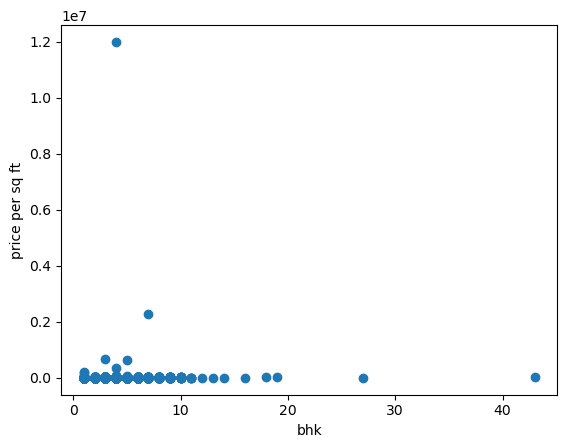

In [29]:
plt.scatter(df2.bhk, df2.price_per_sqft)
plt.xlabel("bhk")
plt.ylabel("price per sq ft")
# outliers present here too, removal will allow us to see patterns

<h3>Outlier removal</h3>


Visualizing the outliers


In [35]:
features = ["bhk", "price_per_sqft", "bath", "price", "total_sqft"]
features

['bhk', 'price_per_sqft', 'bath', 'price', 'total_sqft']

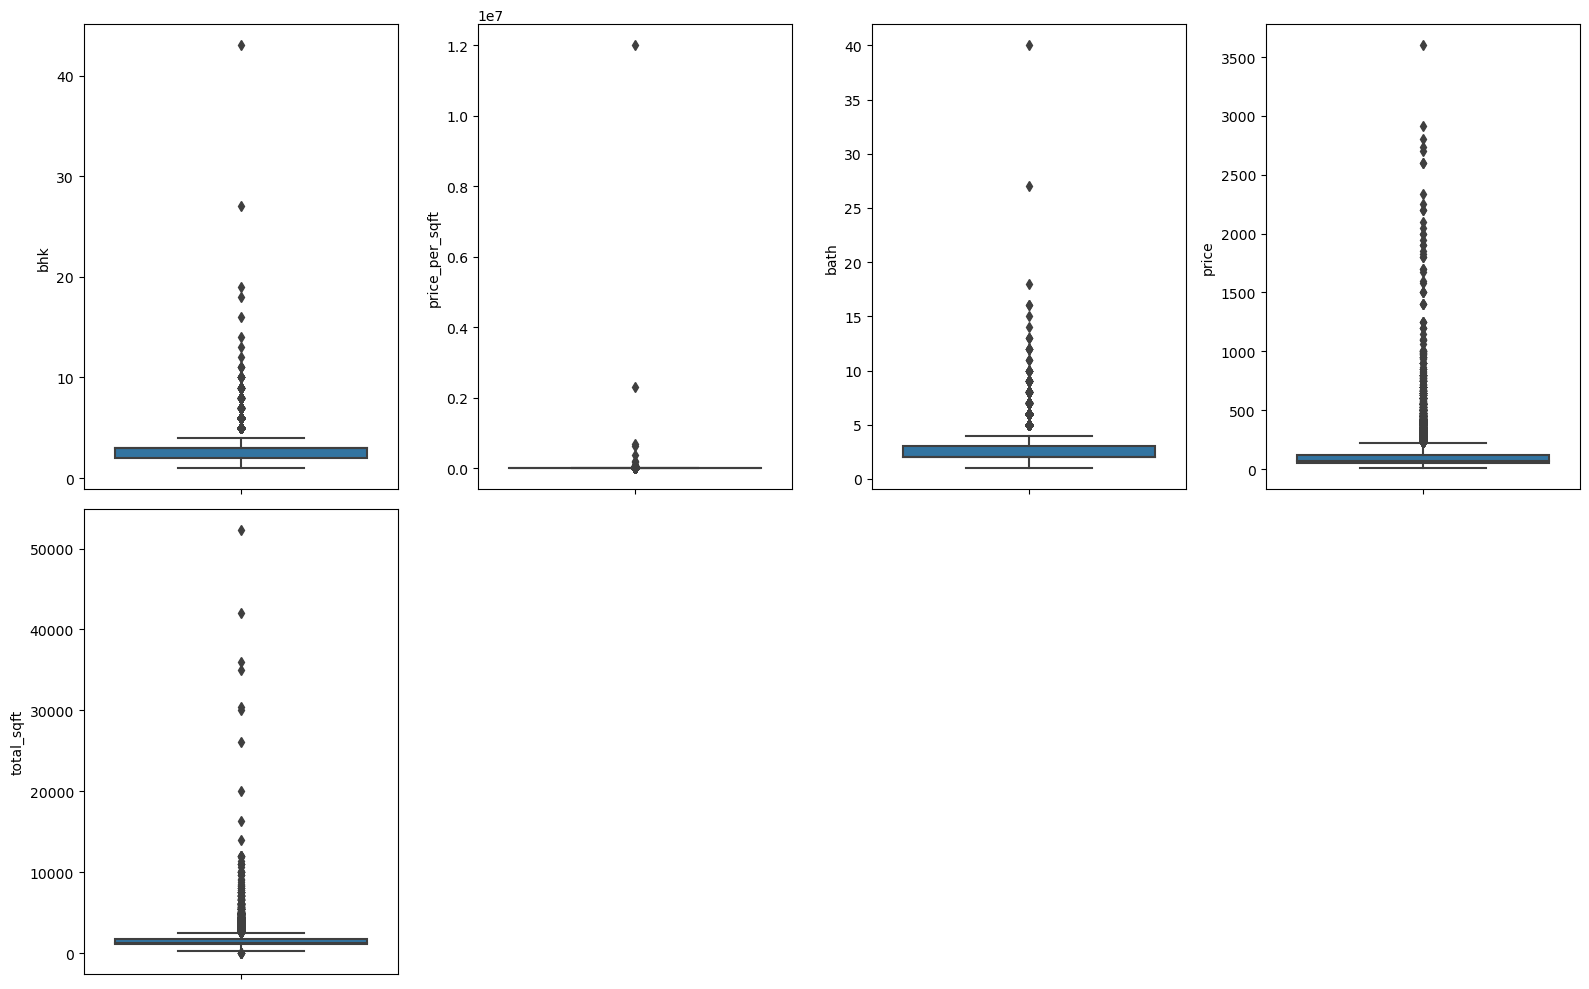

In [36]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=col, data=df2)
    plt.ylabel(col)

plt.tight_layout()

In [ ]:
Q1 = df2["price_per_sqft"].quantile(0.25)
Q3 = df2["price_per_sqft"].quantile(0.75)
IQR = Q3 - Q1

# removing outliers from the price_per_sqft column
df2 = df2[
    (df2["price_per_sqft"] >= Q1 - 1.5 * IQR)
    & (df2["price_per_sqft"] <= Q3 + 1.5 * IQR)
]